Pequeño programa de prueba para 'aplastar' una función latente con la función logit.

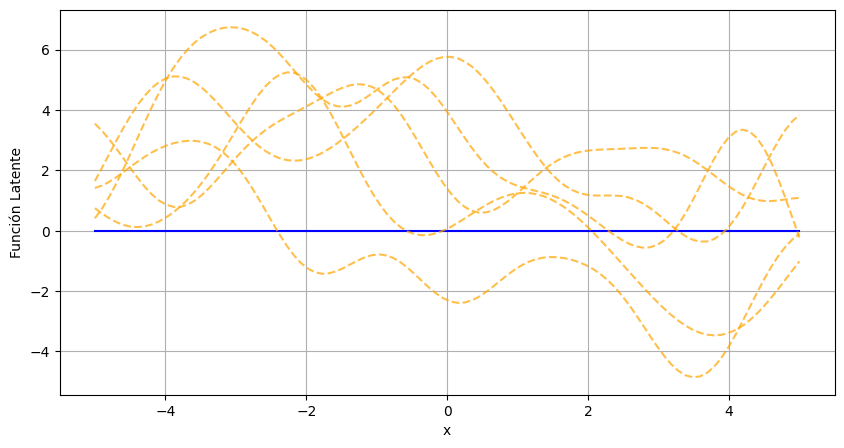

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# Definir los puntos x donde se evaluará la función latente
x = np.linspace(-5, 5, 100).reshape(-1, 1)

# Definir el kernel (núcleo) RBF (también conocido como kernel Gaussiano)
kernel = 1.0 * RBF(length_scale=1.0)

# Inicializar el modelo de proceso gaussiano con el kernel definido
gp = GaussianProcessRegressor(kernel=kernel)

# Generar valores de la función latente (muestras del proceso gaussiano)
latent_function_mean, latent_function_cov = gp.predict(x, return_cov=True)

# Modificar la matriz de covarianza para aumentar la varianza de las muestras
latent_function_cov *= 7.0  # Aumentar la varianza por un factor de 7

# Muestrear valores de la función latente de la distribución gaussiana multivariada
latent_function_samples = np.random.multivariate_normal(
    mean=latent_function_mean, cov=latent_function_cov, size=5
)

# Graficar la función latente y algunas muestras
plt.figure(figsize=(10, 5))
plt.plot(x, latent_function_mean, label='Función Latente', color='blue')
for sample in latent_function_samples:
    plt.plot(x, sample, linestyle='--', alpha=0.7, color='orange')
plt.xlabel('x')
plt.ylabel('Función Latente')
plt.grid(True)
plt.show()


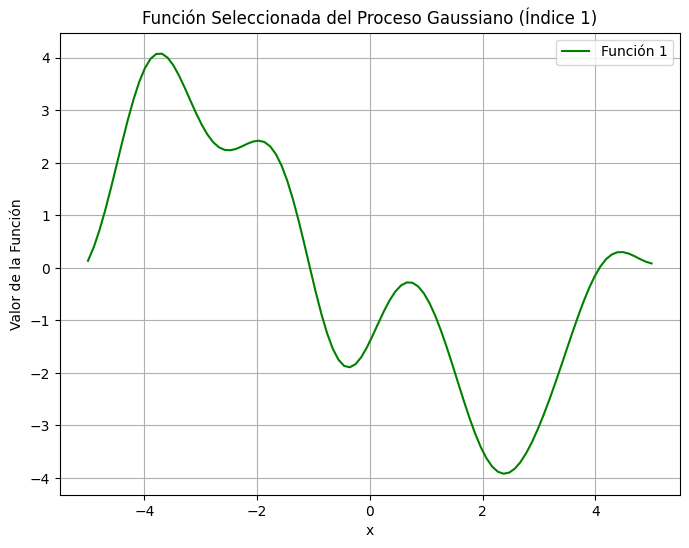

In [114]:
# Seleccionar una función específica del conjunto de muestras
indice_funcion = 1 # Índice de la función que deseas seleccionar (cambiar según sea necesario)
latent_function = latent_function_samples[indice_funcion]

# Graficar la función seleccionada
plt.figure(figsize=(8, 6))
plt.plot(x, latent_function, label=f'Función {indice_funcion}', color='green')
plt.xlabel('x')
plt.ylabel('Valor de la Función')
plt.title(f'Función Seleccionada del Proceso Gaussiano (Índice {indice_funcion})')
plt.legend()
plt.grid(True)
plt.show()


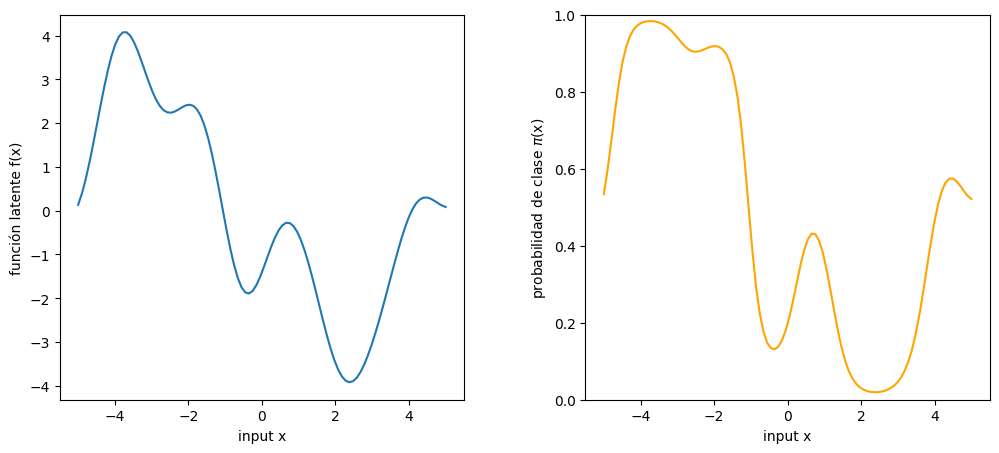

In [115]:
# Aplicar la función logística (logit)
def logit(x):
    return 1 / (1 + np.exp(-x))

logit_values = logit(latent_function)

# Crear el gráfico
plt.figure(figsize=(12, 5))

# Gráfico de la función latente
plt.subplot(1, 2, 1)
plt.plot(x, latent_function, label='Función Latente')
plt.xlabel('input x')
plt.ylabel('función latente f(x)')
#plt.legend()

# Gráfico de la función logística (logit)
plt.subplot(1, 2, 2)
plt.plot(x, logit_values, label='Función Logística (Logit)', color='orange')
plt.xlabel('input x')
plt.ylabel('probabilidad de clase $\pi$(x)')
plt.ylim(0, 1)  # Limitar el eje y al intervalo [0, 1]
#plt.legend()

# Ajustar el espacio horizontal entre los subgráficos
plt.subplots_adjust(wspace=0.3)

plt.show()